<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_2_K%C3%BCl%C3%B6nbs%C3%A9gkeres%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [1]:
import cv2
import matplotlib.pyplot as plt

Képek letöltése

In [2]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Spot_the_difference-kitchen.png

--2024-10-27 19:03:41--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/Spot_the_difference-kitchen.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44189 (43K) [image/png]
Saving to: ‘Spot_the_difference-kitchen.png’

Spot_the_difference 100%[===================>]  43.15K  --.-KB/s    in 0.01s   

2024-10-27 19:03:42 (2.95 MB/s) - ‘Spot_the_difference-kitchen.png’ saved [44189/44189]



Kép beolvasása, felosztása két különböző képre, majd az abszolút különbségük megjelenítése

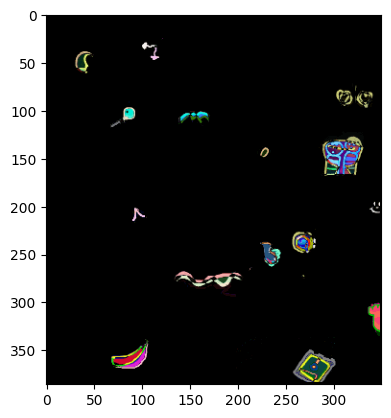

In [6]:
image = cv2.imread("Spot_the_difference-kitchen.png")

# Külön szedjük a két képet, és reménykedünk, hogy egymáshoz képest nem lesznek pár pixellel elcsúszva
middle = image.shape[1] // 2
img1 = image[:, :middle]
img2 = image[:, middle:]

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Abszolút különbséget veszünk, mivel a megjelenő és az eltűnő részek is változásnak számítanak
difference = cv2.absdiff(img1, img2)

plt.imshow(difference)

Különbségek bekeretezése

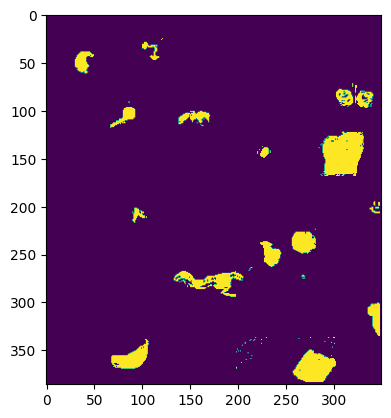

In [7]:
# Hogy tresholdolhassunk, a képet szürkeárnyalatosra állítjuk
difference = cv2.cvtColor(difference, cv2.COLOR_RGB2GRAY)

# Tresholding - ha a pixel értéke eltér a feketétől, 255re állítjuk.
# Vagyis állítanánk, ha nem lenne zajos a kép. A kis zaj miatt nem 0-tól tresholdolunk, hanem pl 40-től
_, thresholded_difference = cv2.threshold(difference,40,255,0)

plt.imshow(thresholded_difference)

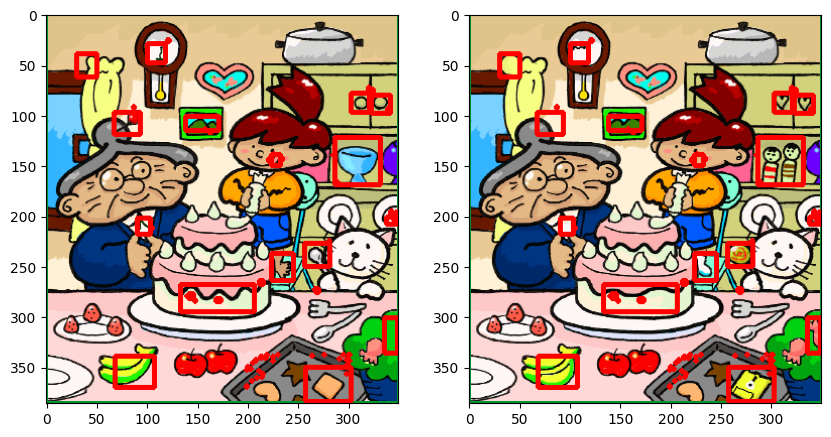

In [8]:
contours, hierarchy = cv2.findContours(thresholded_difference, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),3)
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(img1)
ax2.imshow(img2)